### Visualizing data with geographic location

In [ ]:
# The aim of this project: to create a map for tailoring a weekend camping trip

In [2]:
# The dataset is from Department of Environmental Conservation in the sate of New York
# the dataset is shapefile containing information about forests, wilderness areas and other lands

In [3]:
import geopandas as gpd

In [9]:
# Read the data
data = gpd.read_file(r"C:\Users\Rabbil\Documents\GeoPython\geoAnalysis_Kaggle\DEC_lands\DEClands.shp")

In [10]:
# view first few rows
data.head()

,OBJECTID,CATEGORY,UNIT,FACILITY,CLASS,UMP,DESCRIPTIO,REGION,COUNTY,URL,SOURCE,UPDATE_,OFFICE,ACRES,LANDS_UID,GREENCERT,UMPURL,SHAPE_AREA,SHAPE_LEN,geometry
0,2743,FOREST PRESERVE,AFP,FULTON CHAIN WILD FOREST,WILD FOREST,FULTON CHAIN,None,6,HERKIMER,https://www.dec.ny.gov/lands/75305.html,DECRP,3/11,HERKIMER,739.361639,4239,N,http://www.dec.ny.gov/lands/51309.html,2.992090e+06,14445.172046,"POLYGON ((502476.666 4842386.993, 502476.739 4..."
1,2744,FOREST PRESERVE,AFP,FULTON CHAIN WILD FOREST,WILD FOREST,FULTON CHAIN,None,6,HERKIMER,https://www.dec.ny.gov/lands/75305.html,DECRP,11/08,HERKIMER,7.538903,3841,N,http://www.dec.ny.gov/lands/51309.html,3.050886e+04,870.836410,"POLYGON ((502090.747 4840324.577, 502110.011 4..."
2,2745,FOREST PRESERVE,AFP,INDEPENDENCE RIVER WILD FOREST,WILD FOREST,INDEPENDENCE RIVER,None,6,LEWIS,https://www.dec.ny.gov/lands/58192.html,DECRP,8/19,LOWVILLE,76519.233602,4253,N,https://www.dec.ny.gov/lands/22574.html,3.096624e+08,270633.583850,"POLYGON ((508503.626 4864992.965, 509092.576 4..."
3,2746,FOREST PRESERVE,AFP,INDEPENDENCE RIVER WILD FOREST,WILD FOREST,INDEPENDENCE RIVER,None,6,LEWIS,https://www.dec.ny.gov/lands/58192.html,DECRP,3/11,LOWVILLE,223.803334,4252,N,https://www.dec.ny.gov/lands/22574.html,9.057000e+05,5609.447134,"POLYGON ((490114.810 4859403.501, 490142.561 4..."
4,2747,FOREST PRESERVE,AFP,INDEPENDENCE RIVER WILD FOREST,WILD FOREST,INDEPENDENCE RIVER,None,6,LEWIS,https://www.dec.ny.gov/lands/58192.html,DECRP,3/11,LOWVILLE,114.466837,4019,N,https://www.dec.ny.gov/lands/22574.html,4.632309e+05,2723.724659,"POLYGON ((481679.514 4853407.042, 481072.554 4..."


In [11]:
# data types: data is in GeoDataFrame object
type(data)

geopandas.geodataframe.GeoDataFrame

In [14]:
# selecting subset of data
sub_data = data.loc[:, ['CLASS', 'COUNTY', 'geometry']].copy()

In [16]:
# viewing the list and number of different land types in 'CLASS'
# by using value_counts() method
sub_data['CLASS'].value_counts()

WILD FOREST                   963
INTENSIVE USE                 107
PRIMITIVE                      63
WILDERNESS                     52
UNCLASSIFIED                   13
HISTORIC                        5
PRIMITIVE BICYCLE CORRIDOR      4
CANOE AREA                      1
Name: CLASS, dtype: int64

In [17]:
sub_data['CLASS'].unique() # unique() method only tells the unique values

array(['WILD FOREST', None, 'INTENSIVE USE', 'WILDERNESS', 'PRIMITIVE',
       'UNCLASSIFIED', 'PRIMITIVE BICYCLE CORRIDOR', 'HISTORIC',
       'CANOE AREA'], dtype=object)

In [20]:
# we can also use loc, iloc and isin method to select subset of data

### conditional selectors: isnin(), isnull() or notnull() methods

In [22]:
# applying isin() method within a category
# selecting lands that fall under WILD FOREST AND WILDERNESS category
wild_lands = sub_data.loc[sub_data.CLASS.isin(['WILD FOREST', 'WILDERNESS'])].copy()
wild_lands.head()

,CLASS,COUNTY,geometry
0,WILD FOREST,HERKIMER,"POLYGON ((502476.666 4842386.993, 502476.739 4..."
1,WILD FOREST,HERKIMER,"POLYGON ((502090.747 4840324.577, 502110.011 4..."
2,WILD FOREST,LEWIS,"POLYGON ((508503.626 4864992.965, 509092.576 4..."
3,WILD FOREST,LEWIS,"POLYGON ((490114.810 4859403.501, 490142.561 4..."
4,WILD FOREST,LEWIS,"POLYGON ((481679.514 4853407.042, 481072.554 4..."


<AxesSubplot:>

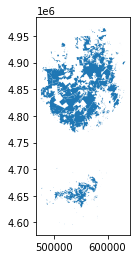

In [24]:
# plotting the data using plot()
# In GeoDataFrame we have a special columns named 'geometry'. it contains all 
#geometric  objects that will be displayed when we call plot() method
wild_lands.plot()

In [25]:
wild_lands.geometry.head()

0    POLYGON ((502476.666 4842386.993, 502476.739 4...
1    POLYGON ((502090.747 4840324.577, 502110.011 4...
2    POLYGON ((508503.626 4864992.965, 509092.576 4...
3    POLYGON ((490114.810 4859403.501, 490142.561 4...
4    POLYGON ((481679.514 4853407.042, 481072.554 4...
Name: geometry, dtype: geometry

In [ ]:
# we see that ploygon objects in our geodataframe
# there are also other types of objects such as Point, LineString

In [27]:
# let's create more GeoDataFrames with Point and LineString object

In [30]:
# Campsites data in NYS (Point data)
point_data = gpd.read_file(r'C:\Users\Rabbil\Documents\GeoPython\geoAnalysis_Kaggle\DEC_pointsinterest\DEC_pointsinterest\Decptsofinterest.shp')
point_data.head()

,OBJECTID,UNIT,FACILITY,NAME,ASSET,DESCRIP,REGION,OFFICE,UPDATED,ASSET_UID,ACCESSIBLE,geometry
0,91706,CFP,DELAWARE WILD FOREST,ADA PRIMITIVE CAMPSITE,PRIMITIVE CAMPSITE,None,4,STAMFORD,2016-09-26,16519,N,POINT (505138.696 4649388.247)
1,108646,SCHUYLER 02,SUGAR HILL STATE FOREST,MAPLE LANE CAMPSITE #3,PRIMITIVE CAMPSITE,None,8,BATH,2018-02-23,18124,N,POINT (333481.874 4692737.800)
2,19933,AFP,MOOSE RIVER PLAINS WILD FOREST,MOOSE RIVER PLAINS CAMPSITE 103,PRIMITIVE CAMPSITE,LIVE,5,NORTHVILLE,2010-06-16,1018,N,POINT (525210.784 4833837.295)
3,3945,ALLEGANY 12,LOST NATION STATE FOREST,NEWLAND FR PARKING,UNPAVED PARKING LOT,-99,9,WEST ALMOND,None,8623,N,POINT (231909.125 4712818.500)
4,1037,CATTARAUGUS 08,ROCK CITY STATE FOREST,LRC PICNIC PAVILION #1,PICNIC PAVILION,None,9,ALLEGANY,None,14561,N,POINT (193656.734 4679632.500)


In [31]:
point_data.ASSET.unique()

array(['PRIMITIVE CAMPSITE', 'UNPAVED PARKING LOT', 'PICNIC PAVILION',
       'BOAT LAUNCH', 'PAVED PARKING LOT', 'DAY USE AREA', 'LEAN-TO',
       'SCENIC VISTA', 'OBSERVATION PLATFORM', 'PICNIC TABLE',
       'PICNIC SITE', 'FISHING PIER', 'FIRE TOWER', 'EQUESTRIAN PLATFORM',
       'FISHING PLATFORM', 'FISHING ACCESS SITE', 'OBSERVATION TOWER',
       'VISITOR CENTER'], dtype=object)

In [33]:
campsites = point_data.loc[point_data.ASSET=='PRIMITIVE CAMPSITE'].copy()
#campsites.head()

In [34]:
# Foot trails in NYS (LineString)
lineString = gpd.read_file(r'C:\Users\Rabbil\Documents\GeoPython\geoAnalysis_Kaggle\DEC_roadstrails\DEC_roadstrails\Decroadstrails.shp')
lineString.head()

,OBJECTID,UNIT,FACILITY,NAME,ASSET,ATV,FOOT,HORSE,BIKE,XC,...,MAPPWD,DESCRIP,ROAD_CLASS,UPDATED,REGION,OFFICE,MARKER,TRANS_UID,SHAPE_LEN,geometry
0,208,AFP,FERRIS LAKE WILD FOREST,PHANTOM TRAIL,SNOWMOBILE TRAIL,N,Y,N,N,Y,...,N,None,RT,2011-05-17,5,NORTHVILLE,None,1583.181399,1577.112643,"LINESTRING (511367.312 4804744.000, 511442.406..."
1,211,AFP,FERRIS LAKE WILD FOREST,PHANTOM TRAIL,SNOWMOBILE TRAIL,N,Y,N,N,Y,...,N,None,RT,2011-05-17,5,NORTHVILLE,None,948.150638,945.366235,"LINESTRING (512806.962 4804560.806, 512796.625..."
2,212,AFP,FERRIS LAKE WILD FOREST,PARKER VLY TRAIL,SNOWMOBILE TRAIL,N,Y,N,N,Y,...,N,None,RT,2011-05-17,5,NORTHVILLE,None,3862.887604,3853.119292,"MULTILINESTRING ((515866.032 4804650.001, 5158..."
3,229,AFP,FERRIS LAKE WILD FOREST,WAGONERS LOOP,SNOWMOBILE TRAIL,N,Y,Y,Y,Y,...,N,None,RT,2011-05-17,5,NORTHVILLE,None,10536.778083,10485.458536,"LINESTRING (533975.501 4796126.500, 533992.812..."
4,233,AFP,FERRIS LAKE WILD FOREST,SHERIFF LAKE TRAIL,SNOWMOBILE TRAIL,N,Y,Y,Y,Y,...,N,None,RT,2011-05-17,5,NORTHVILLE,None,1439.438752,1432.490031,"LINESTRING (531496.700 4799892.919, 531482.375..."


In [35]:
lineString.columns

Index(['OBJECTID', 'UNIT', 'FACILITY', 'NAME', 'ASSET', 'ATV', 'FOOT', 'HORSE',
       'BIKE', 'XC', 'MOTORV', 'SNOWMB', 'ADMIN', 'ACCESSIBLE', 'MAPPWD',
       'DESCRIP', 'ROAD_CLASS', 'UPDATED', 'REGION', 'OFFICE', 'MARKER',
       'TRANS_UID', 'SHAPE_LEN', 'geometry'],
      dtype='object')

In [37]:
lineString.ASSET.unique()

array(['SNOWMOBILE TRAIL', 'UNPAVED ROAD', 'FOOT TRAIL', 'UNMARKED TRAIL',
       'MULTIPURPOSE TRAIL', 'SKI TRAIL', 'ACCESSIBLE TRAIL',
       'PAVED ROAD', 'PUBLIC ACCESS ROW', 'BOARDWALK', 'RAILROAD BED',
       'HORSE TRAIL', 'PRIVATE ACCESS ROW', 'PRIVATE TRAIL/ROAD',
       'BIKE TRAIL', None], dtype=object)

In [38]:
trails = lineString.loc[lineString.ASSET=='FOOT TRAIL'].copy()
trails.head()

,OBJECTID,UNIT,FACILITY,NAME,ASSET,ATV,FOOT,HORSE,BIKE,XC,...,MAPPWD,DESCRIP,ROAD_CLASS,UPDATED,REGION,OFFICE,MARKER,TRANS_UID,SHAPE_LEN,geometry
31,304,AFP,DEBAR MOUNTAIN WILD FOREST,MAIN BRANCH CANOE CARRY,FOOT TRAIL,N,M,N,N,N,...,N,None,RT,2006-08-24,5,RAY BROOK,None,244.776100,246.427662,"LINESTRING (542463.277 4933622.421, 542429.239..."
34,311,AFP,DEBAR MOUNTAIN WILD FOREST,CAMP SITE ACCESS TRAIL,FOOT TRAIL,N,Y,N,N,N,...,N,None,RT,2011-04-19,5,RAY BROOK,None,163.203974,163.203974,"LINESTRING (564033.375 4922561.921, 564100.343..."
35,312,AFP,DEBAR MOUNTAIN WILD FOREST,ACCESS TRAIL,FOOT TRAIL,N,Y,N,N,N,...,N,None,RT,2011-04-19,5,RAY BROOK,None,117.720119,117.720119,"LINESTRING (564202.360 4922745.700, 564298.863..."
37,314,AFP,DEBAR MOUNTAIN WILD FOREST,EAST BRANCH CANOE CARRY,FOOT TRAIL,N,Y,N,N,Y,...,N,None,RT,2006-08-24,5,RAY BROOK,None,386.073522,386.073522,"LINESTRING (547547.421 4942827.828, 547629.172..."
38,317,AFP,DEBAR MOUNTAIN WILD FOREST,RAINBOW LAKE TO JONES POND CANOE CARRY,FOOT TRAIL,N,Y,N,N,Y,...,N,None,RT,2011-04-19,5,RAY BROOK,None,127.460965,127.460965,"LINESTRING (564759.838 4923577.416, 564654.630..."


In [39]:
# County boundaries in NYS (Polygon)
counties = gpd.read_file(r'C:\Users\Rabbil\Documents\GeoPython\geoAnalysis_Kaggle\NY_county_boundaries\NY_county_boundaries\NY_county_boundaries.shp')
counties.head()

,STATE,COUNTY,NAME,LSAD,LSAD_TRANS,OID_,COUNTY_FIP,POP2000,WHITE,BLACK,...,FHH_MINORC,FAMILIES,AV_FAM_SZ,HSE_UNITS,URBAN,RURAL,VACANT,OWNER_OCC,RENTER_OCC,geometry
0,36,089,St. Lawrence,06,County,44,089,111931,105782,2664,...,2773,26939,3,49721,16085,33636,9215,28606,11900,"POLYGON ((522686.116 4977770.435, 522785.820 4..."
1,36,019,Clinton,06,County,9,019,79894,74562,2863,...,1951,19261,3,33091,12161,20930,3668,20157,9266,"POLYGON ((576869.554 4981194.984, 576661.323 4..."
2,36,033,Franklin,06,County,16,033,51134,42970,3389,...,1312,11805,3,23936,7409,16527,6005,12638,5293,"POLYGON ((576869.554 4981194.984, 577209.259 4..."
3,36,031,Essex,06,County,15,031,38851,36848,1092,...,810,9832,3,23115,4288,18827,8087,11089,3939,"POLYGON ((622025.362 4932488.545, 621958.049 4..."
4,36,045,Jefferson,06,County,22,045,111738,99118,6517,...,2815,28142,3,54070,20947,33123,14002,23906,16162,"POLYGON ((431513.316 4917024.860, 433126.724 4..."


In [48]:
counties.columns

Index(['STATE', 'COUNTY', 'NAME', 'LSAD', 'LSAD_TRANS', 'OID_', 'COUNTY_FIP',
       'POP2000', 'WHITE', 'BLACK', 'AMER_ES', 'ASIAN', 'HAWN_PI', 'OTHER',
       'MULT_RACE', 'HISPANIC', 'MALE', 'FEMALE', 'M_UNDER5', 'M5_9', 'M10_14',
       'M15_17', 'M18_19', 'M20', 'M21', 'M22_24', 'M25_29', 'M30_34',
       'M35_39', 'M40_44', 'M45_49', 'M50_54', 'M55_59', 'M60_61', 'M62_64',
       'M65_66', 'M67_69', 'M70_74', 'M75_79', 'M80_84', 'M_OVER85',
       'F_UNDER5', 'F5_9', 'F10_14', 'F15_17', 'F18_19', 'F20', 'F21',
       'F22_24', 'F25_29', 'F30_34', 'F35_39', 'F40_44', 'F45_49', 'F50_54',
       'F55_59', 'F60_61', 'F62_64', 'F65_66', 'F67_69', 'F70_74', 'F75_79',
       'F80_84', 'F_OVER85', 'HOUSEHOLDS', 'AV_HH_SIZE', 'HSEHLD_1M',
       'HSEHLD_1F', 'MAR_MINORC', 'MAR_NO_MC', 'MHH_MINORC', 'FHH_MINORC',
       'FAMILIES', 'AV_FAM_SZ', 'HSE_UNITS', 'URBAN', 'RURAL', 'VACANT',
       'OWNER_OCC', 'RENTER_OCC', 'geometry'],
      dtype='object')

In [50]:
counties.NAME.unique()

array(['St. Lawrence', 'Clinton', 'Franklin', 'Essex', 'Jefferson',
       'Lewis', 'Hamilton', 'Herkimer', 'Washington', 'Warren', 'Oswego',
       'Oneida', 'Cayuga', 'Saratoga', 'Orleans', 'Niagara', 'Monroe',
       'Wayne', 'Fulton', 'Onondaga', 'Madison', 'Genesee', 'Erie',
       'Montgomery', 'Ontario', 'Seneca', 'Livingston', 'Rensselaer',
       'Schenectady', 'Otsego', 'Wyoming', 'Schoharie', 'Albany',
       'Cortland', 'Yates', 'Chenango', 'Tompkins', 'Steuben',
       'Chautauqua', 'Schuyler', 'Cattaraugus', 'Allegany', 'Delaware',
       'Columbia', 'Greene', 'Broome', 'Tioga', 'Chemung', 'Ulster',
       'Dutchess', 'Sullivan', 'Orange', 'Putnam', 'Westchester',
       'Rockland', 'Suffolk', 'Bronx', 'New York', 'Nassau', 'Queens',
       'Kings', 'Richmond'], dtype=object)

### creating a map from all the GeoDataFrames

<AxesSubplot:>

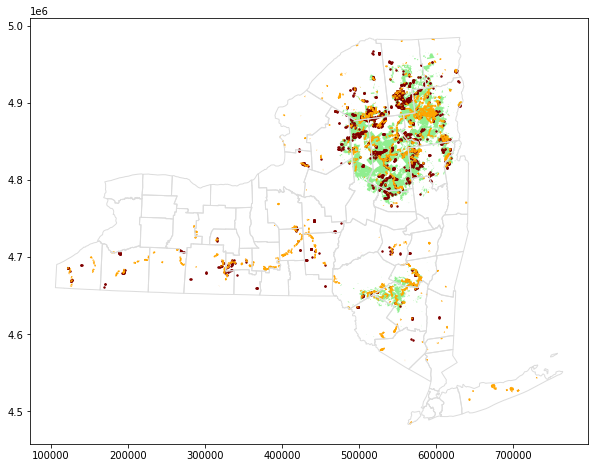

In [47]:
# we will use plot() method 
# the ax parameter ensures that all the information is plotted on the same map

# Create a base map with county boundaries
ax = counties.plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)

# add wildlands, campsites and foot trails to the base map
wild_lands.plot(ax=ax, color='lightgreen')
campsites.plot(ax=ax, color='maroon', markersize=2)
trails.plot(ax=ax, color='orange', markersize=2)

In [ ]:
# It looks like the northeaster part of the state would be a great option for a camping trip !

In [51]:
# If i want to find the holiday trips only within Richmond county
Richmond_county= counties.loc[counties.NAME=='Richmond'].copy()
Richmond_county

,STATE,COUNTY,NAME,LSAD,LSAD_TRANS,OID_,COUNTY_FIP,POP2000,WHITE,BLACK,...,FHH_MINORC,FAMILIES,AV_FAM_SZ,HSE_UNITS,URBAN,RURAL,VACANT,OWNER_OCC,RENTER_OCC,geometry
66,36,085,Richmond,06,County,42,085,443728,344319,42914,...,11158,114052,3,163993,163993,0,7652,99695,56646,"POLYGON ((577100.214 4500115.616, 577235.092 4..."


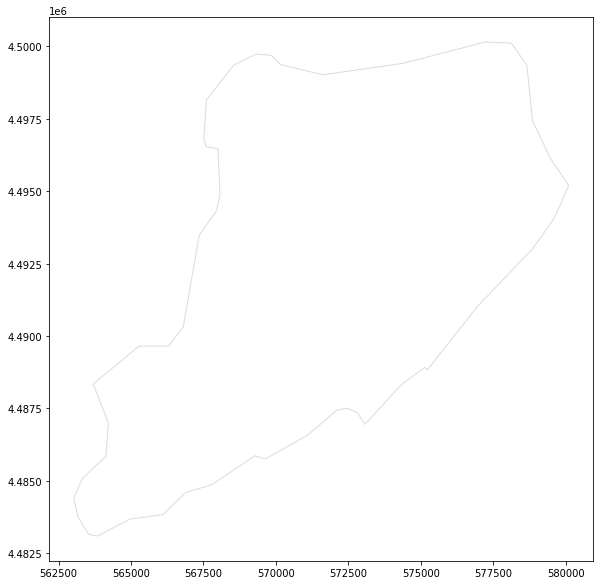

In [56]:
# plotting the map for ony Richmond county
ax = Richmond_county.plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)


